[INFO] [2022.8.19 16:40:5 /home/ubuntu/workspace/nest-simulator-2.18.0/nestkernel/rng_manager.cpp:217 @ Network::create_rngs_] : Creating default RNGs
[INFO] [2022.8.19 16:40:5 /home/ubuntu/workspace/nest-simulator-2.18.0/nestkernel/rng_manager.cpp:260 @ Network::create_grng_] : Creating new default global RNG

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-2.18.0
 Built: Aug  6 2021 13:26:04

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

AUDITORY []
VISUAL:  [80, 70, 85, 120, 80, 70, 90, 95, 85, 95, 105, 95, 110, 115, 110, 80, 85, 70, 115, 110, 125, 115, 115, 120, 85, 285, 250, 270, 340, 275, 365, 295, 295, 300, 355, 360, 300, 340, 260, 285, 365, 265, 260, 300, 330, 270, 300, 270, 270, 290]
FINAL:  []


/tmp/ipykernel_128549/1624135540.py:68: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/tmp/ipykernel_128549/1624135540.py:74: RuntimeWarning:invalid value encountered in true_divide


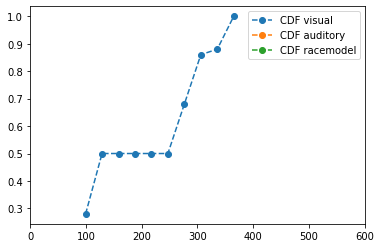

In [1]:
from src.nest.plots.generate import moving_average_plot_no_save
from src.nest.output.rates import calculate_response_times
import json

# 68 is AUDITORY for 100 times
# 91 is VISUAL for 100 times
# 93 is BOTH, MERGED for 100 times
# 100 is BOTH, DIFFERENT CORTEXES for 50 times
exec = '187'
sim = 'cortex_1/1'
with open('output/executions/'+exec+'/simulations/'+sim+'/bin_rates_A_complete.json', 'r') as j:
    bin_rates_A_complete = json.loads(j.read())
with open('output/executions/'+exec+'/simulations/'+sim+'/bin_rates_B_complete.json', 'r') as j:
    bin_rates_B_complete = json.loads(j.read())

ma_rates_A = moving_average_plot_no_save(bin_rates_A_complete)
ma_rates_B = moving_average_plot_no_save(bin_rates_B_complete)

trial_time = 3000
bin_size = 5

th = 15
response_times = []
response_times_A = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
for rt in response_times_A:
    response_times.append(rt%1000)

response_times_B = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
for rt in response_times_B:
    response_times.append(rt%1000)

print('AUDITORY', response_times)

response_times_auditory = response_times

exec = 'cortex_2/2'
with open('output/executions/100/simulations/'+exec+'/bin_rates_A_complete.json', 'r') as j:
    bin_rates_A_complete = json.loads(j.read())
with open('output/executions/100/simulations/'+exec+'/bin_rates_B_complete.json', 'r') as j:
    bin_rates_B_complete = json.loads(j.read())

ma_rates_A = moving_average_plot_no_save(bin_rates_A_complete)
ma_rates_B = moving_average_plot_no_save(bin_rates_B_complete)

trial_time = 3000
bin_size = 5

th = 15
response_times = []
response_times_A = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
for rt in response_times_A:
    response_times.append(rt%1000)

response_times_B = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
for rt in response_times_B:
    response_times.append(rt%1000)

print('VISUAL: ', response_times)

response_times_visual = response_times



# CDF plot for spike times
import numpy as np
import matplotlib.pyplot as plt

race_model = np.minimum.reduce([response_times_visual, response_times_auditory])

print('FINAL: ', race_model)

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return bins_count, cdf

bins_count_visual, cdf_visual = cdf_calc(response_times_visual)
bins_count_auditory, cdf_auditory = cdf_calc(response_times_auditory)
bins_count_racemodel, cdf_racemodel = cdf_calc(race_model)
  
plt.xlim(0, 600)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count_visual[1:], cdf_visual, '--o', label="CDF visual")
plt.plot(bins_count_auditory[1:], cdf_auditory, '--o', label="CDF auditory")
plt.plot(bins_count_racemodel[1:], cdf_racemodel, '--o', label="CDF racemodel")
plt.legend()
plt.show()